Import useful libraries

In [44]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import time
from statistics import mean
# custom module frpm ./mymodul.py
from mymodule import Preparation, ModelContainer

Declare path and another useful constant

In [2]:
DATA_PATHS = ["dataset/base/", "dataset/base_derived/"]
SEQ_DATA_PATHS = ["dataset/seq_base/", "dataset/seq_base_derived/"]
TOTAL_FOLDS = 5

Configure ModelContainer module

In [3]:
ModelContainer.config_train_logs_path(logs_path="comparison-logs/")

ANN Model

In [4]:
%%time
ann_overall_loss = []
ann_overall_accuracy = []
ann_overall_time_taken = []

epochs=20
layers=[512,512,512,512]

for path in DATA_PATHS:
    print(f"== processing : {path}")
    
    loss = []
    accuracy = []
    time_taken = []
    
    for fold in range(5):
        # split data into X and y
        X_train, X_test, y_train, y_test = Preparation.data_xy(DATA_PATHS[1], fold, TOTAL_FOLDS)
        
        # build, compile, train, and test model
        model_name = f"ANN-{path[8:-1]}-fold_{fold+1}"
        _loss, _accuracy, _time_taken = ModelContainer.FCModel(X_train, X_test, y_train, y_test, layers, epochs, model_name)
        
        loss.append(_loss)
        accuracy.append(_accuracy)
        time_taken.append(_time_taken)
        
        print(f"fold {fold+1}/5 ({len(y_train)} train data and {len(y_test)} test data) = loss: {_loss}, accuracy: {_accuracy}, time_taken: {_time_taken} ms/row")
    ann_overall_loss.append(loss)
    ann_overall_accuracy.append(accuracy)
    ann_overall_time_taken.append(time_taken)

== processing : dataset/base/
fold 1/5 (184458 train data and 41919 test data) = loss: 2.3893115520477295, accuracy: 0.327918142080307, time_taken: 6.336591270987509e-06 ms/row
fold 2/5 (178629 train data and 47748 test data) = loss: 2.2877542972564697, accuracy: 0.39582809805870056, time_taken: 4.5712523257861215e-06 ms/row
fold 3/5 (181164 train data and 45213 test data) = loss: 2.379788875579834, accuracy: 0.35819342732429504, time_taken: 5.183301011955952e-06 ms/row
fold 4/5 (181257 train data and 45120 test data) = loss: 2.158970355987549, accuracy: 0.35463207960128784, time_taken: 4.4837435509296176e-06 ms/row
fold 5/5 (180000 train data and 46377 test data) = loss: 1.7680606842041016, accuracy: 0.4007590115070343, time_taken: 4.698229419035332e-06 ms/row
== processing : dataset/base_derived/
fold 1/5 (184458 train data and 41919 test data) = loss: 2.29738712310791, accuracy: 0.367422878742218, time_taken: 5.199668112765537e-06 ms/row
fold 2/5 (178629 train data and 47748 test da

In [5]:
arr = [ann_overall_loss, ann_overall_accuracy, ann_overall_time_taken]
np.save(file="model-comparison-result/ann-model-result", arr=arr)

LSTM Model

In [6]:
%%time
lstm_overall_loss = []
lstm_overall_accuracy = []
lstm_overall_time_taken = []

epochs=10

for path in SEQ_DATA_PATHS:
    print(f"== processing : {path}")
    
    loss = []
    accuracy = []
    time_taken = []
    
    for fold in range(5):
        # split data into X and y
        X_train, X_test, y_train, y_test = Preparation.data_xy(path, fold, TOTAL_FOLDS)
        
        # build, compile, train, and test model
        model_name = f"LSTM-{path[8:-1]}-fold_{fold+1}"
        _loss, _accuracy, _time_taken = ModelContainer.LSTMModel(X_train, X_test, y_train, y_test, epochs, model_name)
        
        loss.append(_loss)
        accuracy.append(_accuracy)
        time_taken.append(_time_taken)
        
        print(f"fold {fold+1}/5 ({len(y_train)} train data and {len(y_test)} test data) = loss: {_loss}, accuracy: {_accuracy}, time_taken: {_time_taken} ms/row")
    lstm_overall_loss.append(loss)
    lstm_overall_accuracy.append(accuracy)
    lstm_overall_time_taken.append(time_taken)

== processing : dataset/seq_base/
fold 1/5 (184590 train data and 41952 test data) = loss: 1.1959013938903809, accuracy: 0.35585907101631165, time_taken: 8.041195111089222e-05 ms/row
fold 2/5 (178761 train data and 47781 test data) = loss: 1.029210090637207, accuracy: 0.486595094203949, time_taken: 8.008160773453503e-05 ms/row
fold 3/5 (181296 train data and 45246 test data) = loss: 1.1353124380111694, accuracy: 0.36334702372550964, time_taken: 8.015911274456258e-05 ms/row
fold 4/5 (181389 train data and 45153 test data) = loss: 1.085862636566162, accuracy: 0.31960225105285645, time_taken: 8.034996000779965e-05 ms/row
fold 5/5 (180132 train data and 46410 test data) = loss: 1.0471912622451782, accuracy: 0.4744236171245575, time_taken: 8.07816446456794e-05 ms/row
== processing : dataset/seq_base_derived/
fold 1/5 (113310 train data and 24132 test data) = loss: 1.2600407600402832, accuracy: 0.30842864513397217, time_taken: 8.927271098575247e-05 ms/row
fold 2/5 (107481 train data and 2996

In [7]:
arr = [lstm_overall_loss, lstm_overall_accuracy, lstm_overall_time_taken]
np.save(file="model-comparison-result/lstm-model-result", arr=arr)

Get result

In [24]:
ann_result = np.load("model-comparison-result/ann-model-result.npy")
lstm_result = np.load("model-comparison-result/lstm-model-result.npy")

In [46]:
DATA_LABELS = ['ANN Base', 'ANN Base Derived', 'LSTM Base', 'LSTM Base Derived']

Aggregate information

In [47]:
loss_arr = [each for each in ann_result[0]]
loss_arr.extend(lstm_result[0])
accuracy_arr = [each for each in ann_result[1]]
accuracy_arr.extend(lstm_result[1])
time_taken_arr = [each for each in ann_result[2]]
time_taken_arr.extend(lstm_result[2])

In [48]:
loss = [mean(each) for each in loss_arr]
accuracy = [mean(each) for each in accuracy_arr]
time_taken = [mean(each) for each in time_taken_arr]
print(loss, accuracy, time_taken)

[2.1967771530151365, 2.2064600467681883, 1.0986955642700196, 1.140193223953247] [0.36746615171432495, 0.3723475456237793, 0.3999654114246368, 0.4158234238624573] [5.054623515738906e-06, 4.760413607901491e-06, 8.035685524869378e-05, 8.834049664044392e-05]


Result visualization

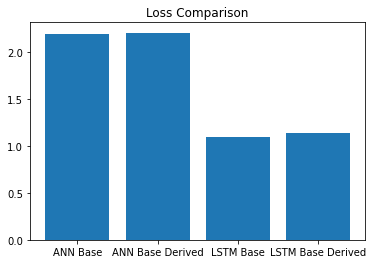

In [51]:
plt.bar(DATA_LABELS, loss)
plt.title("Average Test Loss Comparison")
plt.show()

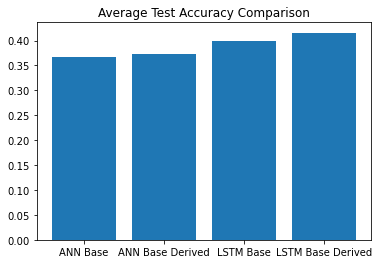

In [52]:
plt.bar(DATA_LABELS, accuracy)
plt.title("Average Test Accuracy Comparison")
plt.show()

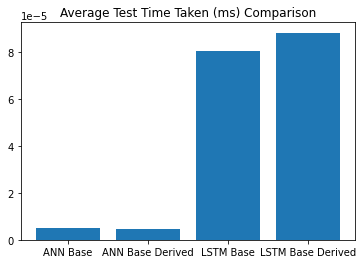

In [54]:
plt.bar(DATA_LABELS, time_taken)
plt.title("Average Test Time Taken (ms) Comparison")
plt.show()